# Visualize Router Results

In [32]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

In [10]:
combine_df = pd.read_csv('../training/checkpoints/eval_results.csv', index_col=0)
nosynth_df = pd.read_csv('../training/checkpoints_noCS/eval_results.csv', index_col=0)
mmlu_df = pd.read_csv('../training/checkpoints_mmlu/eval_results.csv', index_col=0)

combine_df.head()

,Subject,Accuracy,Label,Prediction
0,abstract_algebra,0,"[0, 1, 0, 0]","(0.0, 0.0, 0.0, 0.0)"
1,abstract_algebra,1,"[0, 0, 0, 1]","(0.0, 0.0, 0.0, 1.0)"
2,abstract_algebra,0,"[0, 0, 0, 1]","(1.0, 0.0, 1.0, 0.0)"
3,abstract_algebra,0,"[0, 1, 0, 0]","(0.0, 0.0, 0.0, 0.0)"
4,abstract_algebra,0,"[1, 0, 0, 0]","(0.0, 0.0, 0.0, 1.0)"


In [48]:
combine_acc = combine_df['Accuracy'].mean()
nosynth_acc = nosynth_df['Accuracy'].mean()
mmlu_acc = mmlu_df['Accuracy'].mean()

print(f'Router_Combine Accuracy: {combine_acc:.3f}')
print(f'Router_NoSynth Accuracy: {nosynth_acc:.3f}')
print(f'Router_MMLU Accuracy: {mmlu_acc:.3f}')

mmlu_accuracies = [combine_acc, nosynth_acc, mmlu_acc] 
test_accuracies = [0.27527969, 0.337765, 0.072709]

labels = ['MMLU', 'Test Set']
routers = ['Router_Combine', 'Router_NoSynth', 'Router_MMLU']

Router_Combine Accuracy: 0.124
Router_NoSynth Accuracy: 0.232
Router_MMLU Accuracy: 0.006


In [51]:
# Pearson correlation between MMLU accuracy and accuracy on the training data's test set
mmlu_accuracies = np.array(mmlu_accuracies)
test_accuracies = np.array(test_accuracies)

corr = np.corrcoef(mmlu_accuracies, test_accuracies)[0,1]
print("Pearson Correlation:", corr)

Pearson Correlation: 0.964118396407302


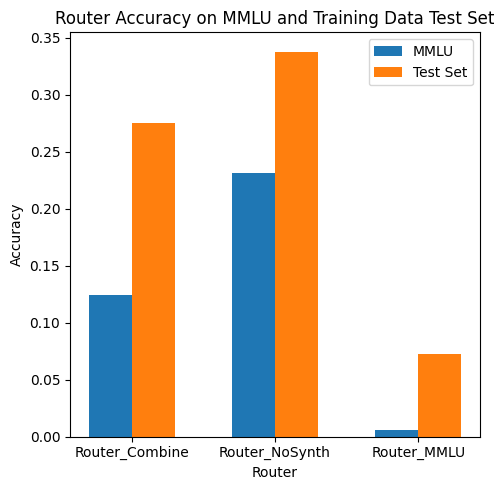

In [54]:
x = np.arange(len(routers))
bar_width=0.3
plt.figure(figsize=(5,5))
plt.bar(x - bar_width/2, mmlu_accuracies, width=bar_width, label='MMLU')
# plt.bar(x, router2, width=bar_width, label='Router_NoSynth')
plt.bar(x + bar_width/2, test_accuracies, width=bar_width, label='Test Set')

plt.xticks(x, routers)
plt.title('Router Accuracy on MMLU and Training Data Test Set')
plt.xlabel('Router')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

plt.savefig('router_accuracy.png', dpi=200)
plt.show()